# Any_Rule Adaptado

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import os

class Automato:
    
    def __init__(self, Number_of_Steps=5, Rule=30, Random = False):#Main
        self.Number_of_Steps = Number_of_Steps
        self.Rule = Rule
        self.Random = Random
        
        self.Width = 2*self.Number_of_Steps + 1 #Garante que Width é ímpar e, portanto,
        #temos uma única célula no centro

#         print('Passo 1')
        self.Cellular_Automaton = self.FirstStep()

        for i in range(Number_of_Steps-1):
#             print('Passo ' + str(i+2))
            self.Cellular_Automaton = self.Step(self.Cellular_Automaton)

    def FirstStep(self):#Initiate_Cellular_Automaton
        '''
        Cria condição inicial (chamado de "step 1" pelo Wolfram) de uma única
        célula preta no centro do autômato.

    -------------------------------------------------------------------------------
        Inputs:
            Width: Número de células do autômato, i.e., largura da malha.

    -------------------------------------------------------------------------------
        Outputs:
            First_Step: Autômato na condiação inicial.
        '''

        if self.Random:
            First_Step = np.random.randint(0,2, (1,self.Width))

        else:
            First_Step = np.full((1, self.Width), 0)
            First_Step[0][int(self.Width/2)] = 1

        return First_Step

    def Step(self,Cellular_Automaton):
        '''
        Aplica a Regra n ∈ [0, 255]
    -------------------------------------------------------------------------------
        Inputs:
            self.Cellular_Automaton: evolução do autômato até o atual n-ésimo passo como
            array (n, Width).
    -------------------------------------------------------------------------------
        Outputs:
            Autômato concatenado com novo passo, resultando em array (n+1, Width).
        '''

        Rule_Bin = np.binary_repr(self.Rule, 8) #Representação binária de 8 bits da regra em string
        #Ex: '01101110' pra Regra 110

        Rule_Bin = np.array([int(_) for _ in Rule_Bin], dtype=np.int8) #Iterando sobre a string para separar os 0's e 1's
        #Ex: [0,1,1,0,1,1,1,0] pra Regra 110

        New_Step = np.vstack((np.roll(Cellular_Automaton[-1:],-1), Cellular_Automaton[-1:], np.roll(Cellular_Automaton[-1:],1))).astype(np.int8)
        #[[0,0,0,1,0,0,0,0,0],
        # [0,0,0,0,1,0,0,0,0],
        # [0,0,0,0,0,1,0,0,0]]    

        u = np.array([[4],[2], [1]])
        #[[4],
        # [2],
        # [1]]

        New_Step = u*New_Step #Multiplica column-wise
        #[[0,0,0,4,0,0,0,0,0],
        # [0,0,0,0,2,0,0,0,0],
        # [0,0,0,0,0,1,0,0,0]] 

        New_Step = np.sum(New_Step, axis= 0).astype(np.int8) #Soma row-wise
        #[0,0,0,4,2,1,0,0,0]

        New_Step = np.array([Rule_Bin[7 - New_Step]]) #Aplica a regra
        #[0,0,0,0,1,1,0,0,0]
        return np.concatenate((Cellular_Automaton, New_Step))

    def Plot(self, Save=False):
        '''
        Gera imagem da evolução do autômato em todos os passos.

    -------------------------------------------------------------------------------
            evolução do autômato celular ao longo de todos os
            passos na forma de um array (número de passo, 2*número de passo + 1) 
            de zeros (casas brancas) e uns (casas pretas).
        '''

        Number_of_Steps = self.Cellular_Automaton.shape[0]

        Plot_Width = 20
        fig, axs = plt.subplots(1, 1, figsize=(Plot_Width+1, (Plot_Width-1)/2))
        plt.title("Regra "+str(self.Rule), fontsize = 50)
        axs.pcolormesh(np.flip(self.Cellular_Automaton), edgecolors = 'white', cmap = 'binary', label = 'Passos Totais: '+str(Number_of_Steps),linewidths =5/self.Number_of_Steps)

        plt.axis('off')
        
        axs.grid(color='white', ls='solid')
        axs.grid(True)
        axs.set_xlabel('X [pixels]')
        axs.set_ylabel('Y [pixels]')
        plt.tight_layout()
        if Save:
            # Não sobrescrever imagem
            outfilename = 'Regra'+str(self.Rule)+'_'+str(Number_of_Steps)+'passos_'
            i = 0
            while os.path.exists(outfilename + str(i) + '.png'):
                i += 1

            plt.savefig(outfilename + str(i) + '.pdf', bbox_inches='tight', dpi=300)
        
        plt.show()

In [220]:
n = 1000
Random = True

## Classe 1: Regra 0 com 100 passos

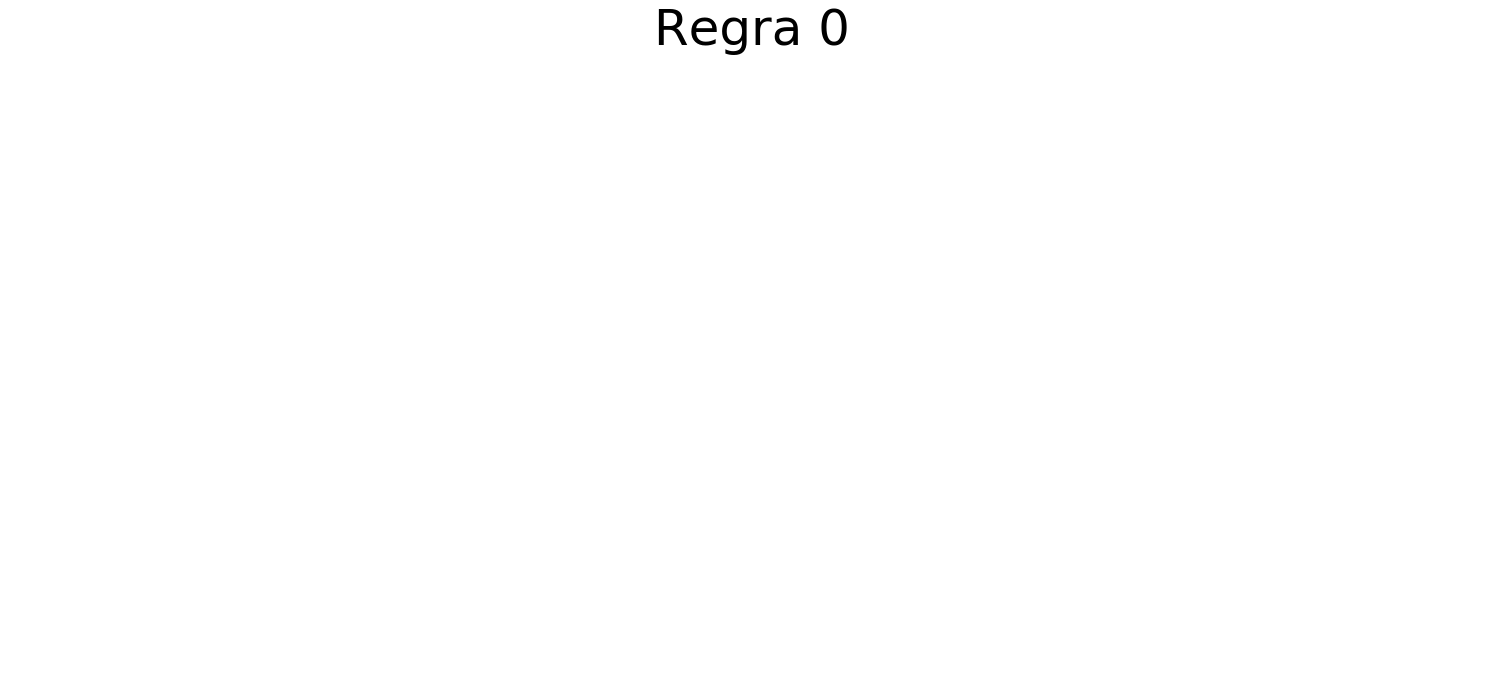

In [221]:
Steps, Rule = n, 0 
Rule_0 = Automato(Steps, Rule, Random)
Rule_0.Plot()

## Classe 2: Regra 222 com 100 passos

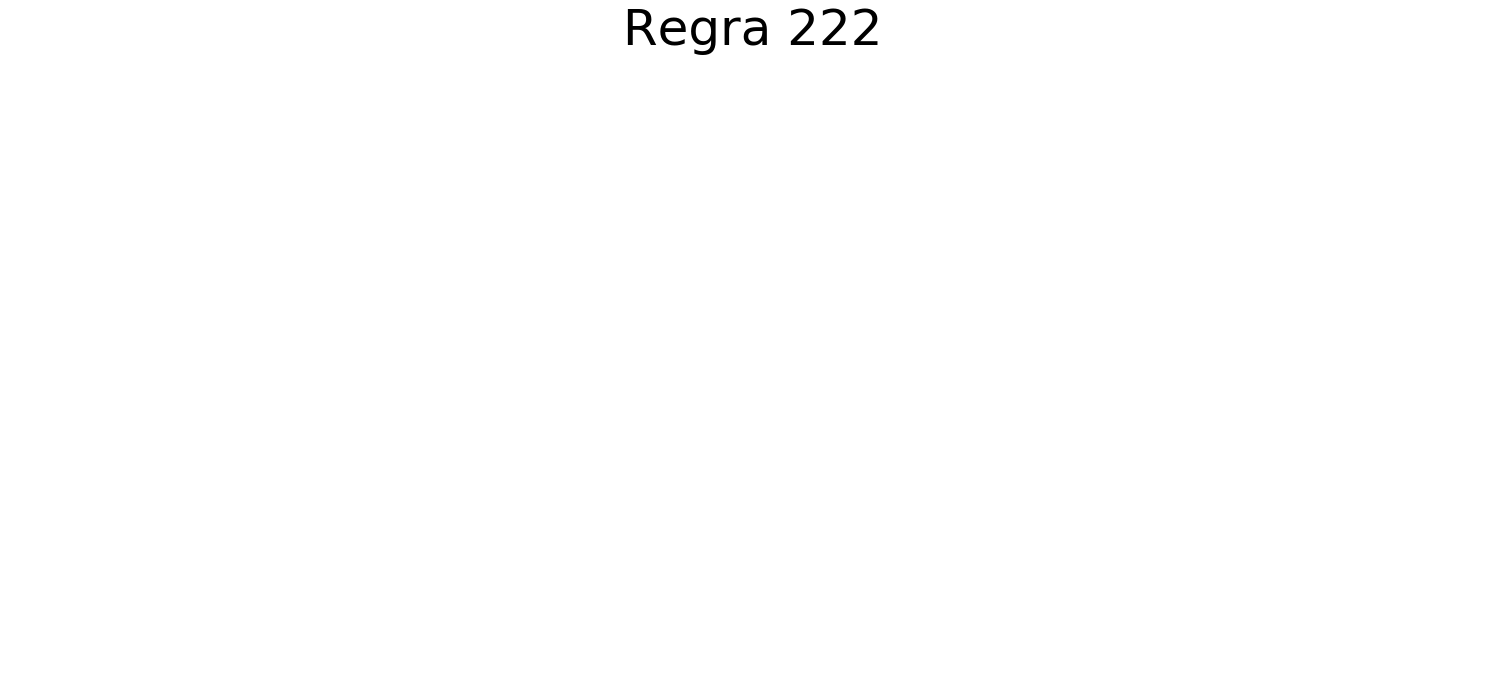

In [222]:
Steps, Rule = n, 222 
Rule_222 = Automato(Steps, Rule, Random)
Rule_222.Plot()

## Classe 3: Regra 30 

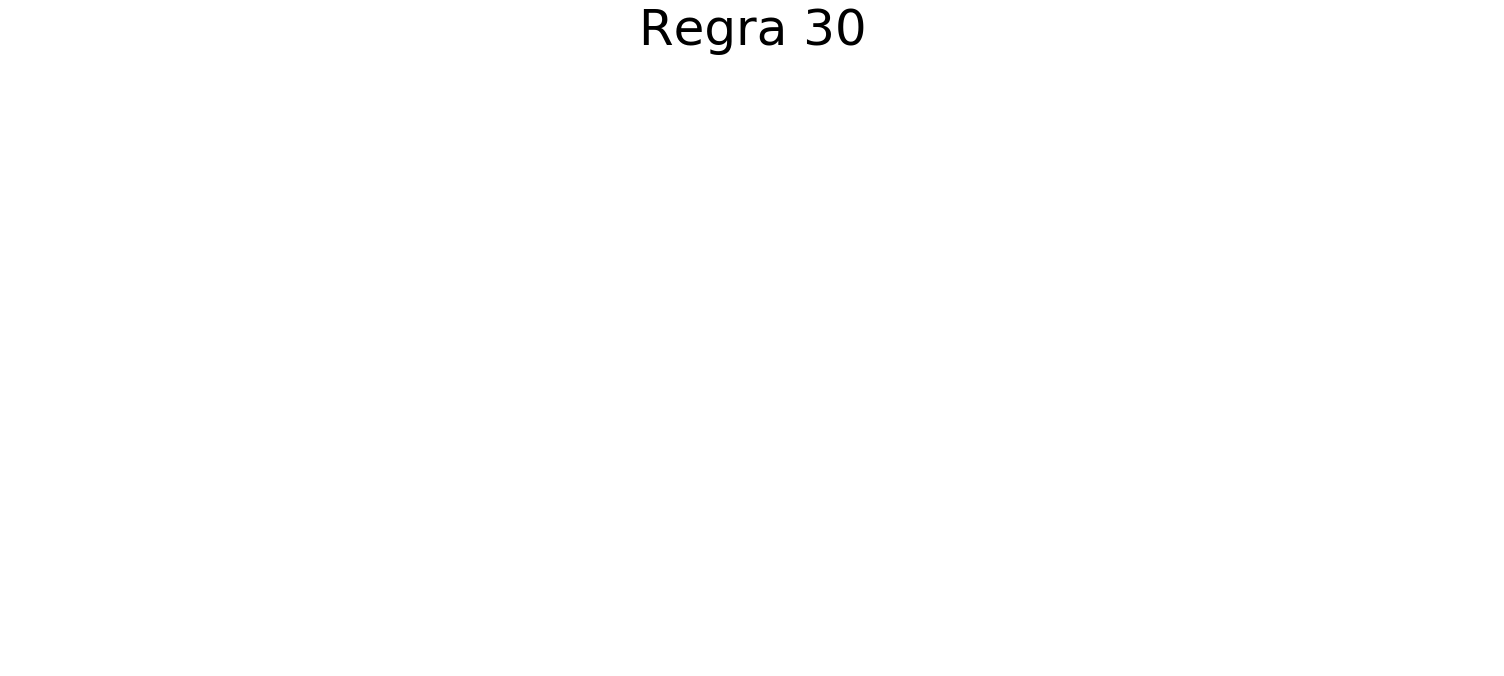

In [223]:
Steps, Rule = n, 30 
Rule_30 = Automato(Steps, Rule, Random)
Rule_30.Plot()

## Classe 4: Regra 110

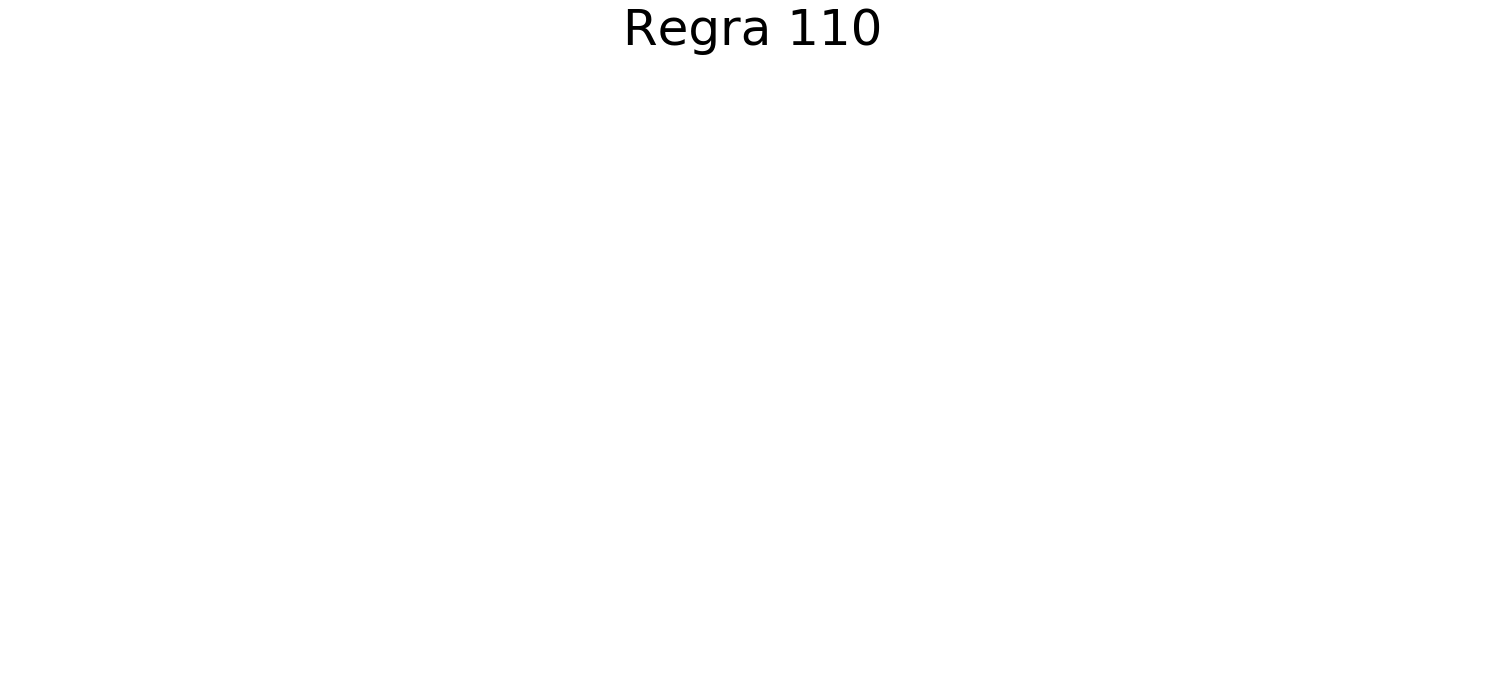

In [224]:
Steps, Rule = n, 110 
Rule_110 = Automato(Steps, Rule, Random)
Rule_110.Plot()

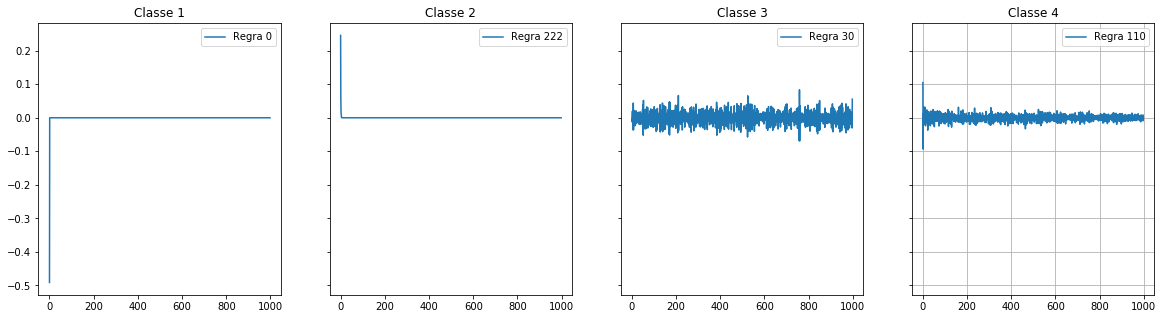

In [225]:
C1,C2,C3,C4 = [],[],[],[]

for i in range(1,n):
    C1.append(np.mean(Rule_0.Cellular_Automaton[i]-Rule_0.Cellular_Automaton[i-1]))
    C2.append(np.mean(Rule_222.Cellular_Automaton[i]-Rule_222.Cellular_Automaton[i-1]))
    C3.append(np.mean(Rule_30.Cellular_Automaton[i]-Rule_30.Cellular_Automaton[i-1]))
    C4.append(np.mean(Rule_110.Cellular_Automaton[i]-Rule_110.Cellular_Automaton[i-1]))
fig, [axs1,axs2,axs3, axs4] = plt.subplots(1, 4, figsize=(20, 5), sharey = True)

plt.grid()
    
axs1.set_title("Classe 1")
axs1.plot(C1, label= "Regra 0")
axs1.legend()
#     axs1.set_title("Histogram")
#     axs1.hist(L, density=True, facecolor='g', alpha=0.75)

axs2.set_title("Classe 2")
axs2.plot(C2, label= "Regra 222")
axs2.legend()
#axs2.set_xlim(0,len(L))

axs3.set_title("Classe 3")
axs3.plot(C3, label= "Regra 30")
axs3.legend()
#axs3.set_xlim(0,len(L))

axs4.set_title("Classe 4")
axs4.plot(C4, label= "Regra 110")
axs4.legend()

plt.show()

### Teste de vários plots

In [204]:
##Não pronto!!!!

steps, classe, random = 10, [0,222,30,110], True
examples = [[],[],[],[]]

for n in range(len(classe)):
    for i in range(4):
        automato  = Automato(steps, classe[n], Random).Cellular_Automaton
        for linha in range(steps):
            examples[n][i].append(np.mean(automato[linha]-automato[linha-1]))

fig, axs = plt.subplots(1, 4, figsize=(20, 5))#, sharey = True)

for i in range(4):
    axs[i].set_title("Classe "+str(i+1))
    axs[i].grid()
    cont = 0
    for j in examples[i]:
        cont+=1
        axs[i].plot(j, label= "Regra 0, i = "+str(cont))
    axs[i].legend()
        
#     axs1.set_title("Histogram")
#     axs1.hist(L, density=True, facecolor='g', alpha=0.75)

plt.show()   

IndexError: list index out of range